# Libraries

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data

In [ ]:
data=pd.read_csv("aircraft_price.csv")
data.head(5)

### Aperçu rapide

In [ ]:
print("Shape :", data.shape)

Nous travaillons avec 517 valueurs et 15 carateristiques (or la variable cible 'price')

In [ ]:
# Info générale sur les colonnes
data.info()

On a 14 variables numériques et 2 variables catégorielles, Pas de NA sauf 10 valeurs manquantes uniquement dans price (variable cible)

L'objectif de mon projet est de trouver pour ces 10 valeurs manquantes la meilleir predictions. 
Pour cela apres avoir rester les differents algorithme de prediction, j;utiliserai celui avec les resultats les plus satisfaisante pour donner une estimaton de ses valeurs manquantes

In [ ]:
application_data = data[data["price"].isna()].reset_index(drop=True)


# Supprimer uniquement les lignes où le prix manque
data = data.dropna(subset=["price"]).reset_index(drop=True)



## Analyse de donnée

### Les variables

In [ ]:
# Statistiques descriptives des variables numériques
print(data.describe().T)

In [ ]:
data['engine_type'].unique()


#### Prix

Moyenne : 2 362 673 \$ 
Écart-type : 1 018 731 \$ 
Min : 650 000 \$ 
Max : 5 100 000 \$ 

In [ ]:

# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(data["price"], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution du prix des appareils")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=data["price"], ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("Prix ($)")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

L'histogramme, avec la courbe de densité (KDE) superposée, montre la fréquence des différentes tranches de prix.

La distribution est étalée vers la droite signe d'une asymétrique positive et semble être bimodale car elle présente deux pics majeurs de fréquence. Ces modes indiquent la presence de sous-populations d'appareils qui se vendent à des prix intrinsèquement différents ce qui rend d'autant plus importantes les variables explicatives categorielles

Le boxplot résume les statistiques clés de la distribution :

Médiane est nettement située à gauche de la plage totale des données, confirmant l'asymétrie positive vue dans l'histogramme (la majorité des données sont concentrées aux prix inférieurs).

On note la presence de valeur Aberrante (Outlier), un appareil dont le prix est exceptionnellement élevé par rapport à la grande majorité des autres prix. 

Nous devons donc choisir un modele robuste aux valeurs aberrantes et à la presente d'aysmetrie et de plusieurs mode.

Aussi, une transformation logarithmique de la variable `price` est necessaire afin de rendre la distribution plus symétrique, ce qui améliore la validité des hypothèses statistiques et la performance de la majorité des modèles de régression.



#### type_engine

In [ ]:
# Tableau des effectifs par type de motorisation
engine_type_table = (
    data["engine_type"]
    .value_counts()
    .reset_index()
)

engine_type_table.columns = ["Type de motorisation", "Nombre d'appareils"]

engine_type_table

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(np.log(data["price"]), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution du log(prix) des appareils")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=np.log(data["price"]), ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("log(Prix)")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

#### Puissance moteur (engine_power)

Minimum :  63HP
Moyenne : 869 HP
Médiane : 285 HP
Max : 14 750 HP

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(data["engine_power"], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution de la puissance machine des appareils")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=data["engine_power"], ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("puissance (HP)")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

Distribution extrêmement étalée : beaucoup de petits appareils, mais quelques jets très puissants.
La médiane << moyenne → distribution fortement asymétrique.

Dans son état brut, 
cette variable est dominée par le bruit ou la faible variance pour la majorité des observations. 
Pour un modèle de régression cela pourrait causer une diminution de la capacité du modèle à détecter la relation entre la puissance et le prix dans la région la plus dense (les faibles puissances).

Une solution serait comme pour le prix d''effectuer une Ttransformation Logarithmique.
L'' objectif est de comprimer l''échelle de l''axe des X, rendant les différences entre 0 et 1000 HP plus importantes, et les différences entre 12 000 et 14 000 HP moins importantes, ce qui est souvent plus pertinent pour le prix.

In [ ]:
# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(np.log(data["engine_power"]), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution de la log(puissance) machine des appareils")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=np.log(data["engine_power"]), ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("log(puissance)")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

#### le poids

5. Poids à vide (empty_weight)
	•	Moyenne : 4 377 kg,
	•	Médiane : 2 286 kg
	•	Max : 46 800 kg



In [ ]:
# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(data["empty_weight"], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution du poids à vide des appareils")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=data["empty_weight"], ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("poids (KG)")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

Distribution fortement asymetrique et une presense de outliers forte.
La forme de variable precon

→ Très bonne variable prédictive potentielle.


In [ ]:
# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(np.log(data["empty_weight"]), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution du log(poids à vide) des appareils")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=np.log(data["empty_weight"]), ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("log (poids) ")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

#### range

In [ ]:
# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(data["range"], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution de l'autonomie des appareils")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=data["range"], ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("Autonomie (km)")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

In [ ]:
# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(np.log(data["range"]), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution du log(autonomie) des appareils")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=np.log(data["range"]), ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("log(Autonomie) ")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

In [ ]:
# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(data["fuel_tank"], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution de la capacité du réservoir")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=data["fuel_tank"], ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("Capacité (L)")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

In [ ]:
# Création d'une figure avec 2 sous-graphes (lignes, colonnes)
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, 
                         gridspec_kw={'height_ratios': [0.8, 0.2]}) 

# --- Sous-graphe 1 : Histogramme (Distribution) ---
sns.histplot(np.log(data["fuel_tank"]), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution de la log(capacité) du réservoir")
axes[0].set_ylabel("Fréquence")
axes[0].set_xlabel("") # Enlève le label de l'axe X pour le graphe du haut

# --- Sous-graphe 2 : Boxplot ---
sns.boxplot(x=np.log(data["fuel_tank"]), ax=axes[1], color='lightcoral', orient='h')
axes[1].set_ylabel("") # Aucun label d'axe Y pour le boxplot
axes[1].set_xlabel("log(Capacité)")

# Optimiser l'affichage
plt.tight_layout()
plt.show()

#### Autonomie et réservoir (range, fuel_tank)

In [ ]:
# Distribution de l’autonomie et de la capacité du réservoir
fig, axes = plt.subplots(2, 2, figsize=(10, 5),gridspec_kw={'height_ratios': [0.8, 0.2]})

# Autonomie : Histogramme + KDE
sns.histplot(data["range"], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution de l’autonomie des appareils")
axes[0, 0].set_ylabel("Fréquence")
axes[0, 0].set_xlabel("Autonomie (km)")

# Autonomie : Boxplot
sns.boxplot(x=data["range"], ax=axes[1, 0], color="lightcoral", orient="h")
axes[1, 0].set_xlabel("Autonomie (km)")
axes[1, 0].set_ylabel("")

# Capacité réservoir : Histogramme + KDE
sns.histplot(data["fuel_tank"], kde=True, ax=axes[0, 1], color="skyblue")
axes[0, 1].set_title("Distribution de la capacité du réservoir")
axes[0, 1].set_ylabel("Fréquence")
axes[0, 1].set_xlabel("Capacité (L)")

# Capacité réservoir : Boxplot
sns.boxplot(x=data["fuel_tank"], ax=axes[1, 1], color="lightcoral", orient="h")
axes[1, 1].set_xlabel("Capacité (L)")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()


In [ ]:
# Distribution de l’autonomie et de la capacité du réservoir
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Autonomie : Histogramme + KDE
sns.histplot(np.log(data["range"]), kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution de l’autonomie des appareils")
axes[0, 0].set_ylabel("Fréquence")
axes[0, 0].set_xlabel("Autonomie (km)")

# Autonomie : Boxplot
sns.boxplot(x=np.log(data["range"]), ax=axes[1, 0], color="lightcoral", orient="h")
axes[1, 0].set_xlabel("Autonomie (km)")
axes[1, 0].set_ylabel("")

# Capacité réservoir : Histogramme + KDE
sns.histplot(np.log(data["fuel_tank"]), kde=True, ax=axes[0, 1], color="skyblue")
axes[0, 1].set_title("Distribution de la capacité du réservoir")
axes[0, 1].set_ylabel("Fréquence")
axes[0, 1].set_xlabel("Capacité (L)")

# Capacité réservoir : Boxplot
sns.boxplot(x=np.log(data["fuel_tank"]), ax=axes[1, 1], color="lightcoral", orient="h")
axes[1, 1].set_xlabel("Capacité (L)")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()


#### Vitesses (max_speed, cruise_speed, stall_speed)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'une figure avec 3 sous-graphes (lignes)
fig, axes = plt.subplots(2, 3, figsize=(12, 5), sharex=False,
                         gridspec_kw={'width_ratios': [0.8, 0.8, 0.8],'height_ratios': [0.8, 0.2]})
fig.suptitle("Analyse de la vitesses des appareils", fontsize=16)

# --- 1. max_speed ---
sns.histplot((data["max_speed"]), kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title("Distribution de la vitesse maximale")
axes[0,0].set_ylabel("Fréquence")
axes[0,0].set_xlabel("")

sns.boxplot(x=(data["max_speed"]), ax=axes[1,0], color='lightcoral', orient='h')
axes[1,0].set_xlabel("vitesse (kt)")
axes[1,0].set_ylabel("")

# --- 2. cruise_speed ---
sns.histplot((data["cruise_speed"]), kde=True, ax=axes[0,1], color='lightgreen')
axes[0,1].set_title("Distribution de vitesse de croisière")
axes[0,1].set_ylabel("Fréquence")
axes[0,1].set_xlabel("")

sns.boxplot(x=(data["cruise_speed"]), ax=axes[1,1], color='orange', orient='h')
axes[1,1].set_xlabel("vitesse (kt)")
axes[1,1].set_ylabel("")

# --- 3. stall_speed ---
sns.histplot((data["stall_speed"]), kde=True, ax=axes[0,2], color='violet')
axes[0,2].set_title("Distribution vitesse de décrochage")
axes[0,2].set_ylabel("Fréquence")
axes[0,2].set_xlabel("")

sns.boxplot(x=(data["stall_speed"]), ax=axes[1,2], color='cyan', orient='h')
axes[1,2].set_xlabel("vitesse (kt)")
axes[1,2].set_ylabel("")

# Optimiser l'affichage

plt.tight_layout()
plt.show()


Une observation generale est la bimodalité des distributions indiquant qu'il existe deux catégories d'appareils. 

Ple en détail, Les trois variables de vitesse présentent des distributions asymétriques et plusieurs valeurs extrêmes, correspondamt à des modèles d’appareils réels.
Elles ne doivent donc pas être supprimées. 


Contrairement aux variables comme la puissance moteur, le poids ou la capacité en carburant, elles ne présentent pas de queue lourde ni d’étalement extrême.
L’application d’un log-transform n’apporterait donc pas d’avantage significatif.

Une standardisation est en revanche nécessaire pour les intégrer dans une régression pénalisée ou un réseau de neurones.



#### les distances



In [ ]:
# === Analyse des distances de décollage et d’atterrissage ===

fig, axes = plt.subplots(2, 2, figsize=(10, 5), gridspec_kw={'height_ratios': [0.8, 0.2]})

# --- 1. Takeoff distance ---
sns.histplot(data["takeoff_distance"], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Distribution de la distance de décollage")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Fréquence")

sns.boxplot(x=data["takeoff_distance"], ax=axes[1, 0], color='lightcoral', orient='h')
axes[1, 0].set_xlabel("Distance de décollage (m)")
axes[1, 0].set_ylabel("")

# --- 2. Landing distance ---
sns.histplot(data["landing_distance"], kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Distribution de la distance d’atterrissage")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("")

sns.boxplot(x=data["landing_distance"], ax=axes[1, 1], color='gold', orient='h')
axes[1, 1].set_xlabel("Distance d’atterrissage (m)")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# === Analyse des distances de décollage et d’atterrissage ===

fig, axes = plt.subplots(2, 2, figsize=(10, 5), gridspec_kw={'height_ratios': [0.8, 0.2]})

# --- 1. Takeoff distance ---
sns.histplot(np.log(data["takeoff_distance"]), kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Distribution de la log(distance) de décollage)")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Fréquence")

sns.boxplot(x=np.log(data["takeoff_distance"]), ax=axes[1, 0], color='lightcoral', orient='h')
axes[1, 0].set_xlabel("log(Distance) de décollage")
axes[1, 0].set_ylabel("")

# --- 2. Landing distance ---
sns.histplot(np.log(data["landing_distance"]), kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Distribution de la log(distance) d’atterrissage")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("")

sns.boxplot(x=np.log(data["landing_distance"]), ax=axes[1, 1], color='gold', orient='h')
axes[1, 1].set_xlabel("log(Distance) d’atterrissage")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

#### taux de monté

In [ ]:
fig, axes = plt.subplots(
    2, 2, figsize=(10, 5),
    gridspec_kw={'height_ratios': [0.8, 0.2]}
)

# --- 1. Taux de montée (tous moteurs) ---
sns.histplot(data["all_eng_roc"], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution du taux de montée (tous moteurs)")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Fréquence")

sns.boxplot(x=data["all_eng_roc"], ax=axes[1, 0], color="lightcoral", orient="h")
axes[1, 0].set_xlabel("Taux de montée – tous moteurs (ft/min)")
axes[1, 0].set_ylabel("")

# --- 2. Taux de montée (moteur en panne) ---
sns.histplot(data["out_eng_roc"], kde=True, ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title("Distribution du taux de montée (moteur en panne)")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("")

sns.boxplot(x=data["out_eng_roc"], ax=axes[1, 1], color="gold", orient="h")
axes[1, 1].set_xlabel("Taux de montée – moteur en panne (ft/min)")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(
    2, 2, figsize=(10, 5),
    gridspec_kw={'height_ratios': [0.8, 0.2]}
)

# --- 1. Taux de montée (tous moteurs) ---
sns.histplot(np.log1p(data["all_eng_roc"]), kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution du log(taux de montée – tous moteurs)")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Fréquence")

sns.boxplot(
    x=np.log1p(data["all_eng_roc"]),
    ax=axes[1, 0],
    color="lightcoral",
    orient="h"
)
axes[1, 0].set_xlabel("log(taux de montée – tous moteurs)")
axes[1, 0].set_ylabel("")

# --- 2. Taux de montée (moteur en panne) ---
sns.histplot(np.log1p(data["out_eng_roc"]), kde=True, ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title("Distribution du log(taux de montée – moteur en panne)")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("")

sns.boxplot(
    x=np.log1p(data["out_eng_roc"]),
    ax=axes[1, 1],
    color="gold",
    orient="h"
)
axes[1, 1].set_xlabel("log(taux de montée – moteur en panne)")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

#### les dimensions

In [ ]:
# === Analyse des dimensions (length, wing_span) ===

fig, axes = plt.subplots(2, 2, figsize=(12, 7), gridspec_kw={'height_ratios': [0.8, 0.2]}
)
fig.suptitle("Analyse des variables structurelles", fontsize=16)
# --- 1. Longueur ---
sns.histplot(data["length"], kde=True, ax=axes[0, 0], color='cornflowerblue')
axes[0, 0].set_title("Distribution de la longueur des appareils")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Fréquence")

sns.boxplot(x=data["length"], ax=axes[1, 0], color='salmon', orient='h')
axes[1, 0].set_xlabel("Longueur (ft ou m)")
axes[1, 0].set_ylabel("")

# --- 2. Envergure ---
sns.histplot(data["wing_span"], kde=True, ax=axes[0, 1], color='lightseagreen')
axes[0, 1].set_title("Distribution de l'envergure des appareils")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Fréquence")

sns.boxplot(x=data["wing_span"], ax=axes[1, 1], color='khaki', orient='h')
axes[1, 1].set_xlabel("Envergure (ft ou m)")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# === Analyse des dimensions (length, wing_span) ===
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(12, 7), gridspec_kw={'height_ratios': [0.8, 0.2]}
)
fig.suptitle("Analyse des variables structurelles", fontsize=16)

# --- 1. Longueur ---
sns.histplot(np.log(data["length"]), kde=True, ax=axes[0, 0], color='cornflowerblue')
axes[0, 0].set_title("Distribution de la log(longueur) des appareils")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Fréquence")

sns.boxplot(x=np.log(data["length"]), ax=axes[1, 0], color='salmon', orient='h')
axes[1, 0].set_xlabel("log(Longueur)")
axes[1, 0].set_ylabel("")

# --- 2. Envergure ---
sns.histplot(np.log(data["wing_span"]), kde=True, ax=axes[0, 1], color='lightseagreen')
axes[0, 1].set_title("Distribution de la log(envergure) des appareils")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Fréquence")

sns.boxplot(x=np.log(data["wing_span"]), ax=axes[1, 1], color='khaki', orient='h')
axes[1, 1].set_xlabel("log(Envergure)")
axes[1, 1].set_ylabel("")

plt.tight_layout()
plt.show()

## Pré-traitement

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("aircraft_price.csv")
data.head(5)

application_data = data[data["price"].isna()].reset_index(drop=True)


# Supprimer uniquement les lignes où le prix manque
data = data.dropna(subset=["price"]).reset_index(drop=True)


### encodage

In [7]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [11]:


X = data.drop(columns=["price"])
y = np.log(data["price"])

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

log_features = [
    "engine_power",
    "fuel_tank",
    "empty_weight",
    "takeoff_distance",
    "landing_distance",
    "range",
    "length",
    "wing_span",
    "all_eng_roc",
    "out_eng_roc"
]


for col in log_features:
    X[col]=np.log(X[col])



scaler = MinMaxScaler()

X_scaled=scaler.fit_transform(X[numeric_features])
X_scaled=pd.DataFrame(X_scaled, columns=X[numeric_features].columns)


X_scaled['engine_type']=data['engine_type'].map({
    'Piston': 0,
    'Propjet': 1,
    'Jet':2

}).astype('category')



X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2
)


X_train = pd.DataFrame(X_train, columns=X_scaled.columns)
X_test = pd.DataFrame(X_test, columns=X_scaled.columns)



print("Dimensions X_train :", X_train.shape)
print("Dimensions X_test  :", X_test.shape)


Dimensions X_train : (405, 14)
Dimensions X_test  : (102, 14)


In [ ]:
def pre_traitement(data):
    X = data.drop(columns=["price"])
    y = np.log(data["price"])

    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

    log_features = [
    "engine_power",
    "fuel_tank",
    "empty_weight",
    "takeoff_distance",
    "landing_distance",
    "range",
    "length",
    "wing_span",
    "all_eng_roc",
    "out_eng_roc"
    ]


    for col in log_features:
        X[col]=np.log(X[col])



    scaler = MinMaxScaler()

    X_scaled=scaler.fit_transform(X[numeric_features])
    X_scaled=pd.DataFrame(X_scaled, columns=X[numeric_features].columns)

    X_scaled['engine_type']=data['engine_type'].map({
    'Piston': 0,
    'Propjet': 1,
    'Jet':2 }).astype('category')


    return X_scaled, y


    

# Methodologie

### régression linéaire

Linear Regression
MSE : 0.02973417666541847
R²  : 0.833321626782969


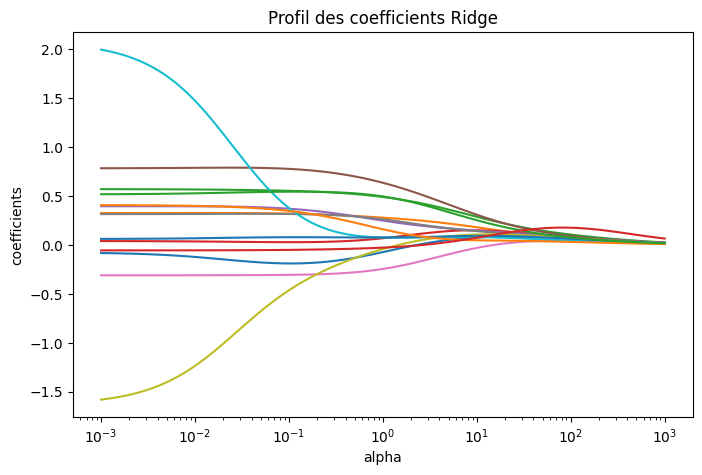

Alpha optimal Ridge : 0.8111308307896873
Ridge MSE : 0.02091008487151805
Ridge R²  : 0.8827860959651822


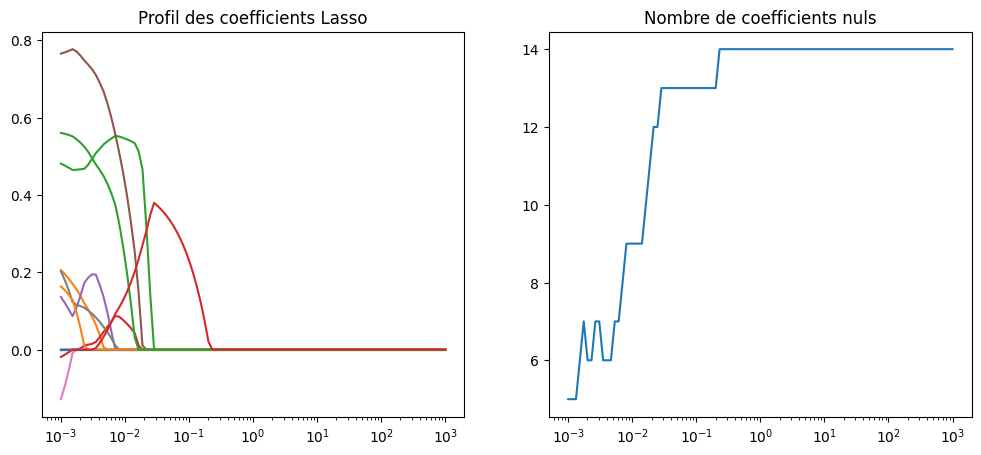

Alpha optimal Lasso : 0.0006007123288760862
Lasso MSE : 0.021832621724814566
Lasso R²  : 0.8776147087204479


In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neural_network import MLPRegressor

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "R2": r2}


# A) Régression linéaire (baseline)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

print("Linear Regression")
print("MSE :", mean_squared_error(y_test, y_pred_lin))
print("R²  :", r2_score(y_test, y_pred_lin))





#B) RidgeCV (calibrage par CV)

alphas = np.logspace(-3, 3, 100)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Profil des coefficients Ridge")
plt.show()


ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train, y_train)

print("Alpha optimal Ridge :", ridge_cv.alpha_)

y_pred_ridge = ridge_cv.predict(X_test)
print("Ridge MSE :", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R²  :", r2_score(y_test, y_pred_ridge))






#C) LassoCV (calibrage + sélection de variables)
alphas = np.logspace(-3, 3, 100)

coefs = []
nb_nul = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    nb_nul.append(np.sum(lasso.coef_ == 0))


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(alphas, coefs)
plt.xscale("log")
plt.title("Profil des coefficients Lasso")

plt.subplot(1,2,2)
plt.plot(alphas, nb_nul)
plt.xscale("log")
plt.title("Nombre de coefficients nuls")

plt.show()

lasso_cv = LassoCV(cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

print("Alpha optimal Lasso :", lasso_cv.alpha_)

y_pred_lasso = lasso_cv.predict(X_test)
print("Lasso MSE :", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R²  :", r2_score(y_test, y_pred_lasso))

selected_vars = pd.Series(lasso_cv.coef_, index=X_test.columns)
selected_vars = selected_vars[selected_vars != 0].sort_values(key=np.abs, ascending=False)
selected_vars



# D) Régression polynomiale (degré calibré)
degrees = [1,2,3,4,5]
results_poly = []
y_pred_poly=-1000000
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_poly, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()
    model.fit(X_tr, y_tr)

    y_pred = model.predict(X_te)
    
    results_poly.append({
        "degree": d,
        "MSE": mean_squared_error(y_te, y_pred),
        "R2": r2_score(y_te, y_pred)
    })



results_poly=pd.DataFrame(results_poly)
best_degree = results_poly.loc[results_poly["MSE"].idxmin(), "degree"]





In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.regularizers import l2


from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)



def build_model(n_features, arch=(128,32,16), lr=1e-3, l2_reg=0.0, dropout=0.0):
    model = Sequential([Input(shape=(n_features,))])
    for units in arch:
        model.add(Dense(units, activation="relu", kernel_regularizer=l2(l2_reg)))
        if dropout > 0:
            model.add(Dropout(dropout))
    model.add(Dense(1))  # sortie linéaire
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="mse",
        metrics=["mse"]
    )
    return model

search_space = [
    {"arch": (128,32,16), "lr": 1e-3, "l2_reg": 0.0,  "dropout": 0.0},
    {"arch": (128,64,32), "lr": 1e-3, "l2_reg": 1e-4, "dropout": 0.0},
    {"arch": (256,128,64), "lr": 5e-4, "l2_reg": 1e-4, "dropout": 0.1},
]

best = {"params": None, "val_mse": np.inf, "model": None, "history": None}

for params in search_space:
    model = build_model(
        n_features=X_tr.shape[1],
        arch=params["arch"],
        lr=params["lr"],
        l2_reg=params["l2_reg"],
        dropout=params["dropout"]
    )
    
    history = model.fit(
        X_tr, y_tr,
        validation_data=(X_val, y_val),
        epochs=500,
        batch_size=128,
        callbacks=[early],
        verbose=0
    )
    
    val_mse = min(history.history["val_mse"])
    if val_mse < best["val_mse"]:
        best.update({"params": params, "val_mse": val_mse, "model": model, "history": history})

best["params"], best["val_mse"]

({'arch': (128, 32, 16), 'lr': 0.001, 'l2_reg': 0.0, 'dropout': 0.0},
 0.04531770199537277)

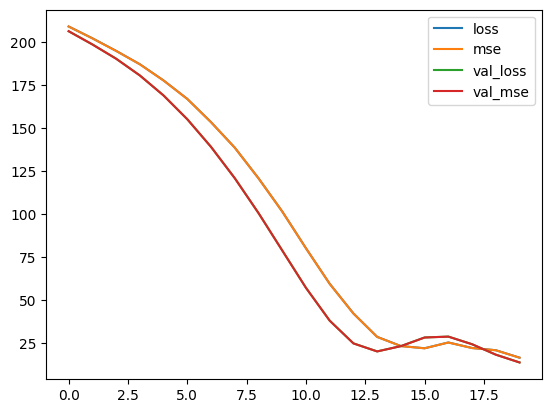

In [14]:
losses= pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_mlp = best["model"].predict(X_test).flatten()
print("Test MSE :", mean_squared_error(y_test, y_pred_mlp))
print("Test R²  :", r2_score(y_test, y_pred_mlp))
print("Best params :", best["params"])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test MSE : 0.1566852851683382
Test R²  : 0.12168247559789425
Best params : {'arch': (128, 32, 16), 'lr': 0.001, 'l2_reg': 0.0, 'dropout': 0.0}


In [16]:
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "Polynomial","Neural Network"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lin),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        results_poly.loc[results_poly["degree"] == best_degree, "MSE"].values[0],
        mean_squared_error(y_test, y_pred_mlp)

        
    ],
    "R2": [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        results_poly.loc[results_poly["degree"] == best_degree, "R2"].values[0],
        r2_score(y_test, y_pred_mlp)
    ]
})

results

,Model,MSE,R2
0,Linear,0.029734,0.833322
1,Ridge,0.020910,0.882786
2,Lasso,0.021833,0.877615
3,Polynomial,0.029059,0.809212
4,Neural Network,0.156685,0.121682


In [18]:
coef_lin = pd.Series(
    lin_reg.coef_,
    index=X_train.columns
).sort_values(key=np.abs, ascending=False)

coef_lin

all_eng_roc         0.718435
empty_weight        0.633065
range               0.521668
cruise_speed        0.487039
landing_distance   -0.479923
takeoff_distance    0.381642
out_eng_roc        -0.319671
fuel_tank           0.262037
max_speed           0.220460
wing_span           0.211245
stall_speed         0.048823
length             -0.023015
engine_type        -0.018562
engine_power       -0.017148
dtype: float64

In [19]:
coef_ridge = pd.Series(
    ridge_cv.coef_,
    index=X_test.columns
).sort_values(key=np.abs, ascending=False)

coef_ridge

all_eng_roc         0.607884
range               0.462494
cruise_speed        0.445712
takeoff_distance    0.297473
out_eng_roc        -0.237852
max_speed           0.197903
empty_weight        0.195070
fuel_tank           0.174478
stall_speed         0.076933
wing_span           0.070398
engine_power       -0.021501
length              0.019082
landing_distance    0.009643
engine_type         0.002771
dtype: float64

In [20]:
coef_lasso = pd.Series(
    lasso_cv.coef_,
    index=X_test.columns
)

coef_lasso_selected = coef_lasso[coef_lasso != 0] \
    .sort_values(key=np.abs, ascending=False)

coef_lasso_selected

all_eng_roc         0.693145
range               0.516913
cruise_speed        0.470643
takeoff_distance    0.348641
empty_weight        0.276253
out_eng_roc        -0.272202
max_speed           0.166267
fuel_tank           0.111148
wing_span           0.046720
dtype: float64

In [21]:
import pandas as pd
import numpy as np

coef_table = pd.DataFrame({
    "Variable": X_train.columns,
    "OLS": lin_reg.coef_,
    "Ridge": ridge_cv.coef_,
    "Lasso": lasso_cv.coef_
})

# Importance relative (basée sur Ridge, plus stable)
coef_table["|Ridge|"] = np.abs(coef_table["Ridge"])

# Tri par importance décroissante
coef_table = coef_table.sort_values("|Ridge|", ascending=False)

coef_table

,Variable,OLS,Ridge,Lasso,|Ridge|
5,all_eng_roc,0.718435,0.607884,0.693145,0.607884
12,range,0.521668,0.462494,0.516913,0.462494
2,cruise_speed,0.487039,0.445712,0.470643,0.445712
7,takeoff_distance,0.381642,0.297473,0.348641,0.297473
6,out_eng_roc,-0.319671,-0.237852,-0.272202,0.237852
1,max_speed,0.220460,0.197903,0.166267,0.197903
9,empty_weight,0.633065,0.195070,0.276253,0.195070
4,fuel_tank,0.262037,0.174478,0.111148,0.174478
3,stall_speed,0.048823,0.076933,0.000000,0.076933
11,wing_span,0.211245,0.070398,0.046720,0.070398


In [22]:
coef_table_rounded = coef_table.copy()
coef_table_rounded[["OLS", "Ridge", "Lasso"]] = coef_table_rounded[["OLS", "Ridge", "Lasso"]].round(3)

coef_table_rounded

,Variable,OLS,Ridge,Lasso,|Ridge|
5,all_eng_roc,0.718,0.608,0.693,0.607884
12,range,0.522,0.462,0.517,0.462494
2,cruise_speed,0.487,0.446,0.471,0.445712
7,takeoff_distance,0.382,0.297,0.349,0.297473
6,out_eng_roc,-0.320,-0.238,-0.272,0.237852
1,max_speed,0.220,0.198,0.166,0.197903
9,empty_weight,0.633,0.195,0.276,0.195070
4,fuel_tank,0.262,0.174,0.111,0.174478
3,stall_speed,0.049,0.077,0.000,0.076933
11,wing_span,0.211,0.070,0.047,0.070398


In [4]:
application_data

,model_name,engine_type,engine_power,max_speed,cruise_speed,stall_speed,fuel_tank,all_eng_roc,out_eng_roc,takeoff_distance,landing_distance,empty_weight,length,wing_span,range,price
0,G164A-300 AG CAT,Piston,600.0,177.0,100.0,52.0,64.0,1360.0,1050.0,1150.0,5200.0,3650.0,306.0,509.0,200.0,NaN
1,G164A-245 AG CAT,Piston,525.0,128.0,91.0,52.0,46.0,1350.0,1706.0,540.0,567.0,4500.0,337.0,507.0,155.0,NaN
2,100 Darter (S.L. Industries),Piston,80.0,157.0,138.0,46.0,17.0,1000.0,820.0,721.0,1320.0,622.0,250.0,425.0,350.0,NaN
3,T 210 F Turbo Centurion,Jet,3786.0,76.0,429.0,82.0,6590.0,3090.0,3460.0,3315.0,19200.0,11310.0,622.0,668.0,2027.0,NaN
4,"210 M,NII (prior'78=less svc. ceil. & r/o/c=860)",Jet,3045.0,76.0,430.0,82.0,5771.0,4230.0,3180.0,2800.0,16300.0,9550.0,587.0,626.0,1960.0,NaN
5,210 F Centurion,Jet,2887.0,70.0,401.0,86.0,4860.0,3195.0,3600.0,3180.0,14800.0,8925.0,566.0,626.0,1900.0,NaN
6,100 Darter (S.L. Industries),Piston,81.0,161.0,117.0,37.0,20.0,680.0,1560.0,1490.0,1609.0,1095.0,282.0,427.0,526.0,NaN
7,205 (M20J),Piston,125.0,163.0,132.0,34.0,25.0,1105.0,1263.0,1235.0,1654.0,1166.0,282.0,428.0,422.0,NaN
8,PA-36-375 Brave (spray restr. category),Piston,125.0,162.0,125.0,49.0,30.0,682.0,1496.0,1519.0,1750.0,1160.0,244.0,345.0,505.0,NaN
9,PA-18 150 Super Cub,Piston,325.0,260.0,250.0,77.0,165.0,1955.0,1980.0,2076.0,3625.0,200.0,337.0,438.0,1137.0,NaN


In [22]:
import numpy as np
import pandas as pd
X_application,_=pre_traitement(application_data)

y_application=ridge_cv.predict(X_application)


prix=np.round(np.exp(y_application),2)


application_data['price']=prix

In [23]:
application_data

,model_name,engine_type,engine_power,max_speed,cruise_speed,stall_speed,fuel_tank,all_eng_roc,out_eng_roc,takeoff_distance,landing_distance,empty_weight,length,wing_span,range,price
0,G164A-300 AG CAT,Piston,600.0,177.0,100.0,52.0,64.0,1360.0,1050.0,1150.0,5200.0,3650.0,306.0,509.0,200.0,1800517.89
1,G164A-245 AG CAT,Piston,525.0,128.0,91.0,52.0,46.0,1350.0,1706.0,540.0,567.0,4500.0,337.0,507.0,155.0,1341561.91
2,100 Darter (S.L. Industries),Piston,80.0,157.0,138.0,46.0,17.0,1000.0,820.0,721.0,1320.0,622.0,250.0,425.0,350.0,1647030.00
3,T 210 F Turbo Centurion,Jet,3786.0,76.0,429.0,82.0,6590.0,3090.0,3460.0,3315.0,19200.0,11310.0,622.0,668.0,2027.0,6524732.61
4,"210 M,NII (prior'78=less svc. ceil. & r/o/c=860)",Jet,3045.0,76.0,430.0,82.0,5771.0,4230.0,3180.0,2800.0,16300.0,9550.0,587.0,626.0,1960.0,7026717.95
5,210 F Centurion,Jet,2887.0,70.0,401.0,86.0,4860.0,3195.0,3600.0,3180.0,14800.0,8925.0,566.0,626.0,1900.0,5957570.33
6,100 Darter (S.L. Industries),Piston,81.0,161.0,117.0,37.0,20.0,680.0,1560.0,1490.0,1609.0,1095.0,282.0,427.0,526.0,1531817.39
7,205 (M20J),Piston,125.0,163.0,132.0,34.0,25.0,1105.0,1263.0,1235.0,1654.0,1166.0,282.0,428.0,422.0,1800975.80
8,PA-36-375 Brave (spray restr. category),Piston,125.0,162.0,125.0,49.0,30.0,682.0,1496.0,1519.0,1750.0,1160.0,244.0,345.0,505.0,1482761.47
9,PA-18 150 Super Cub,Piston,325.0,260.0,250.0,77.0,165.0,1955.0,1980.0,2076.0,3625.0,200.0,337.0,438.0,1137.0,3991009.38
